In [ ]:
import cv2 # opencv-python
import numpy as np
from skimage.filters import threshold_local # scikit-image
import imutils
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


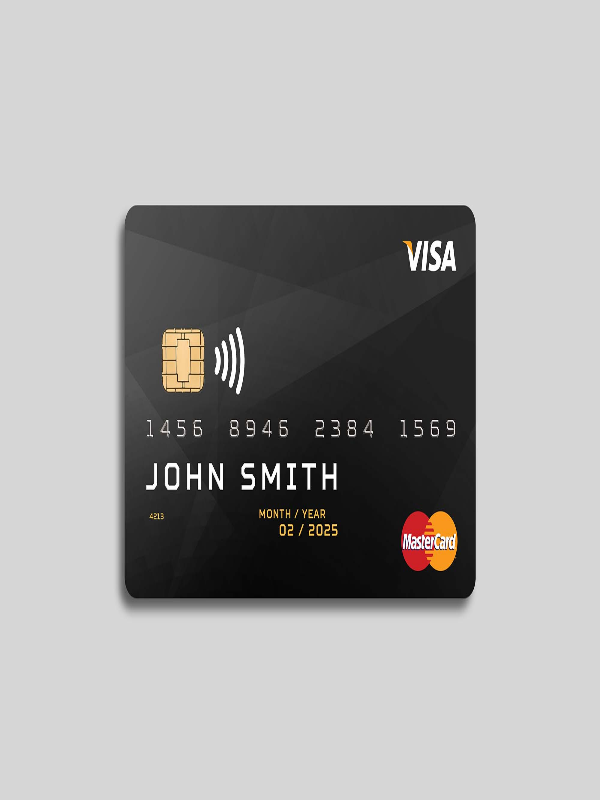

-1

In [ ]:
image = cv2.imread("images-1.jpeg", cv2.IMREAD_COLOR)
image = cv2.resize(image, (600,800))
cv2_imshow(image)
cv2.waitKey(0)

In [ ]:
# Check image shape
image.shape

(800, 600, 3)

[[0.83921569 0.83921569 0.83921569 ... 0.83921569 0.83921569 0.83921569]
 [0.83921569 0.83921569 0.83921569 ... 0.83921569 0.83921569 0.83921569]
 [0.83921569 0.83921569 0.83921569 ... 0.83921569 0.83921569 0.83921569]
 ...
 [0.83921569 0.83921569 0.83921569 ... 0.83921569 0.83921569 0.83921569]
 [0.83921569 0.83921569 0.83921569 ... 0.83921569 0.83921569 0.83921569]
 [0.83921569 0.83921569 0.83921569 ... 0.83921569 0.83921569 0.83921569]]


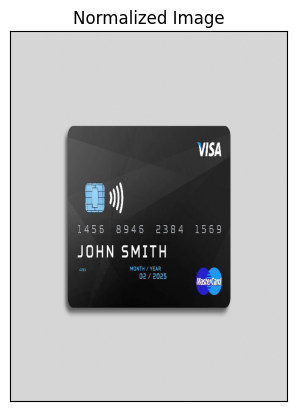

In [ ]:
# Split the image into channels
b, g, r = cv2.split(image)

# Normalization parameter
min_value = 0
max_value = 1
norm_type = cv2.NORM_MINMAX

# Normalize each channel
b_normalized = cv2.normalize(b.astype('float'), None, min_value, max_value, norm_type)
g_normalized = cv2.normalize(g.astype('float'), None, min_value, max_value, norm_type)
r_normalized = cv2.normalize(r.astype('float'), None, min_value, max_value, norm_type)

# Merge the normalized channels back into an image
normalized_image = cv2.merge((b_normalized, g_normalized, r_normalized))
print(normalized_image[:,:,0])

plt.imshow(normalized_image)
plt.xticks([])
plt.yticks([])
plt.title('Normalized Image')
plt.show()

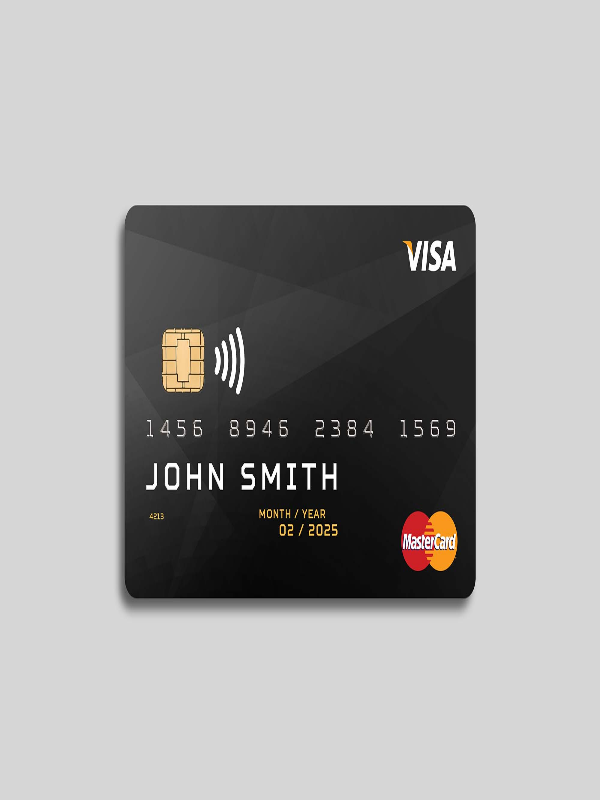

-1

In [ ]:
import numpy as ppool
norm = ppool.zeros((800,800))
img_normalized = cv2.normalize(image,  norm, 0, 255, cv2.NORM_MINMAX)
cv2_imshow(img_normalized)
cv2.waitKey(0)

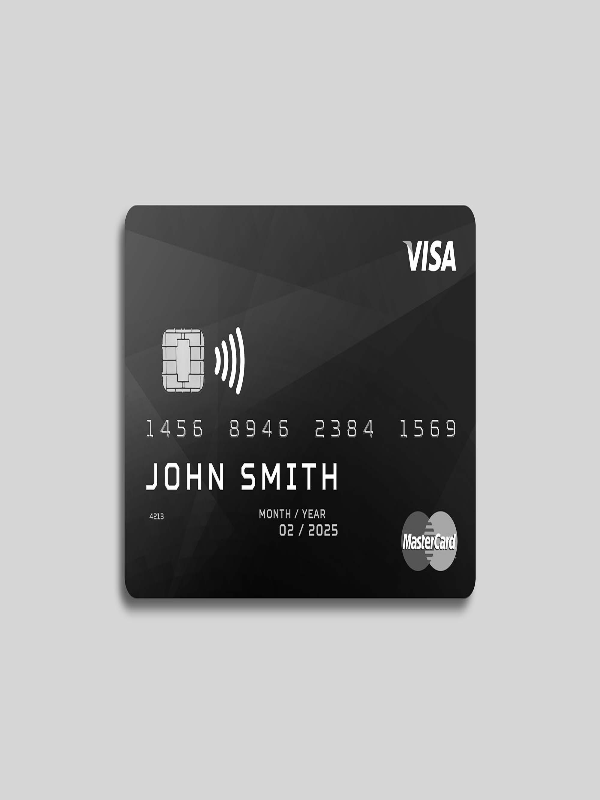

-1

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)
cv2.waitKey(0)

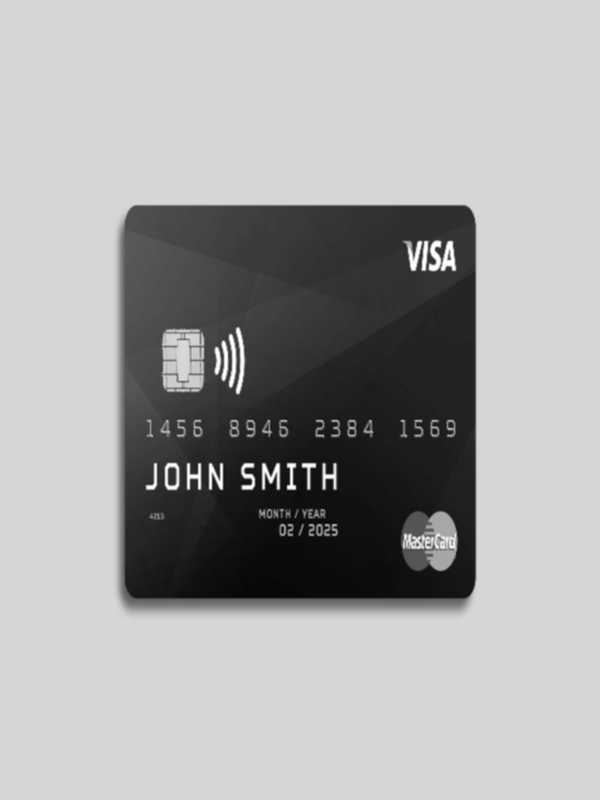

-1

In [ ]:
# blur the image to reduce high frequency noises
image_blurred = cv2.GaussianBlur(gray_image, (3, 3), 0)
cv2_imshow(image_blurred)
cv2.waitKey(0)

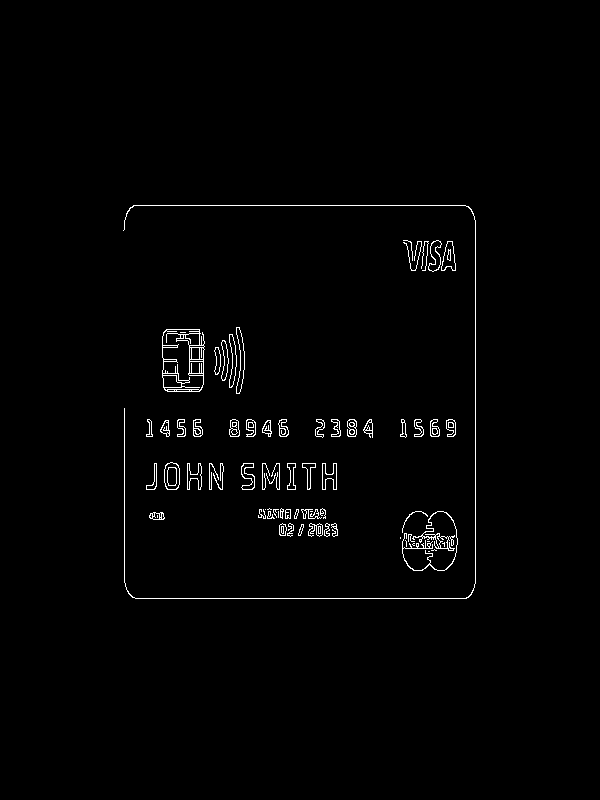

-1

In [ ]:
edges = cv2.Canny(image= image_blurred, threshold1=100, threshold2=200)
cv2_imshow(edges)
cv2.waitKey(0)

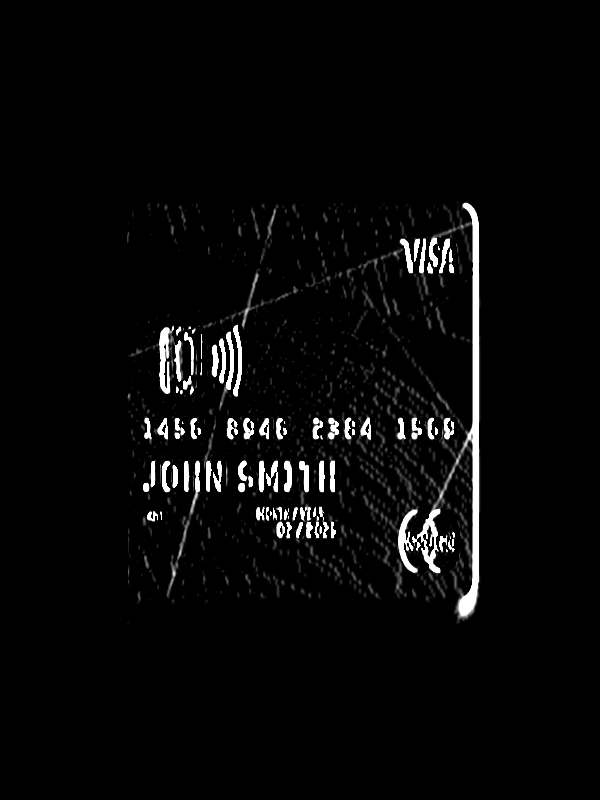

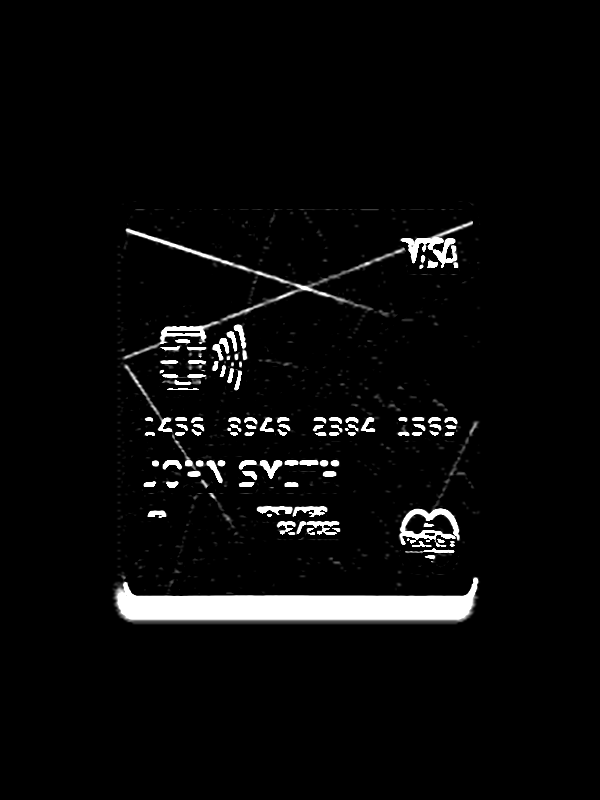

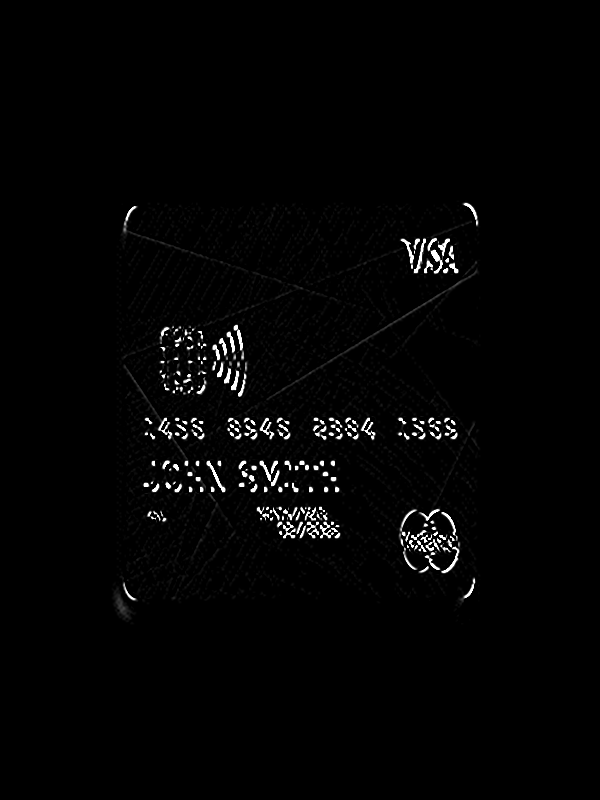

-1

In [ ]:
# Sobel Edge Detection
sobelx = cv2.Sobel(src=image_blurred, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=image_blurred, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=image_blurred, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

# Display Sobel Edge Detection Images
cv2_imshow(sobelx)
cv2.waitKey(0)

cv2_imshow(sobely)
cv2.waitKey(0)

cv2_imshow(sobelxy)
cv2.waitKey(0)

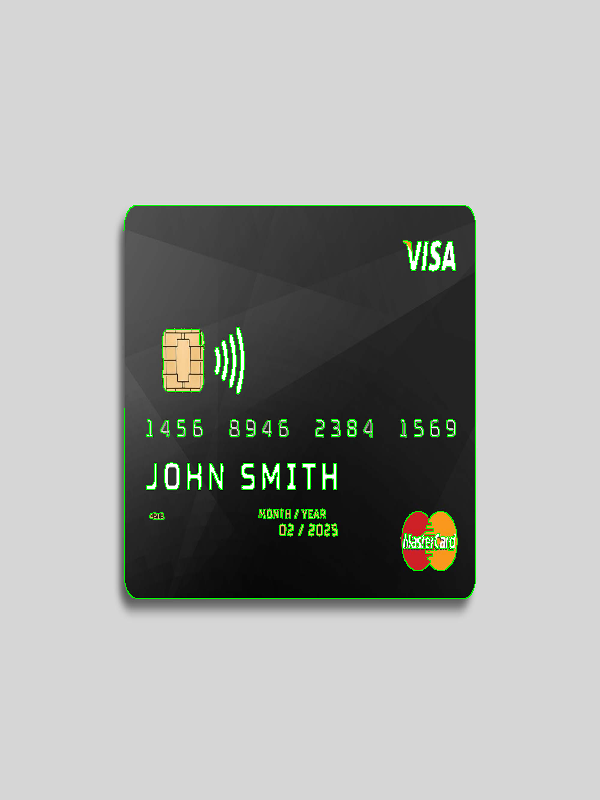

-1

In [ ]:
# find contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# draw all contours on the original image
a = cv2.drawContours(image, contours, -1, (0, 255, 0), 1)
cv2_imshow(a)
cv2.waitKey(0)

In [ ]:
# to collect all the detected polygons
polygons = []

# loop over the contours
for cnt in contours:
    # find the convex hull
    hull = cv2.convexHull(cnt)

    # compute the approx polygon and put it into polygons
    polygons.append(cv2.approxPolyDP(hull, 0.01 * cv2.arcLength(hull, True), False))

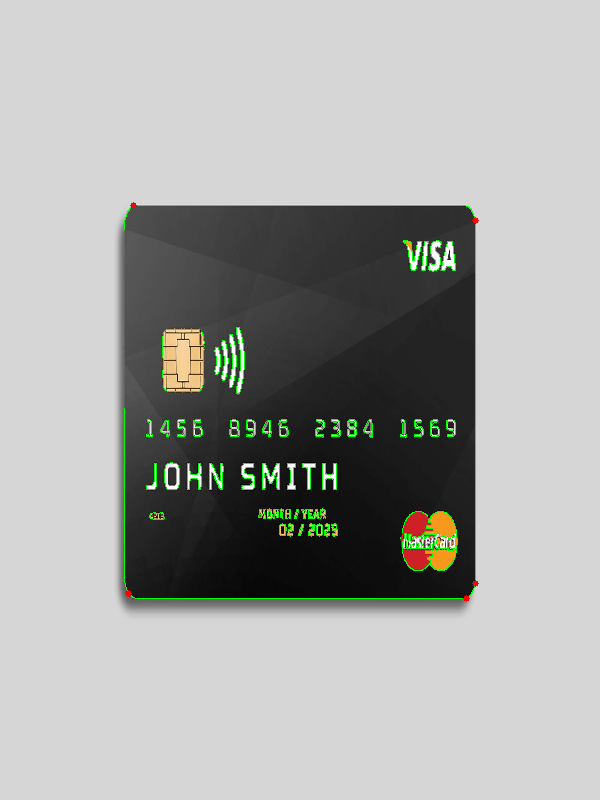

-1

In [ ]:
# sort polygons in desc order of contour area
sortedPoly = sorted(polygons, key=cv2.contourArea, reverse=True)

# draw points of the intersection of only the largest polyogon with red color
polygon = cv2.drawContours(image, sortedPoly[0], -1, (0, 0, 255), 5)

cv2_imshow(polygon)
cv2.waitKey(0)

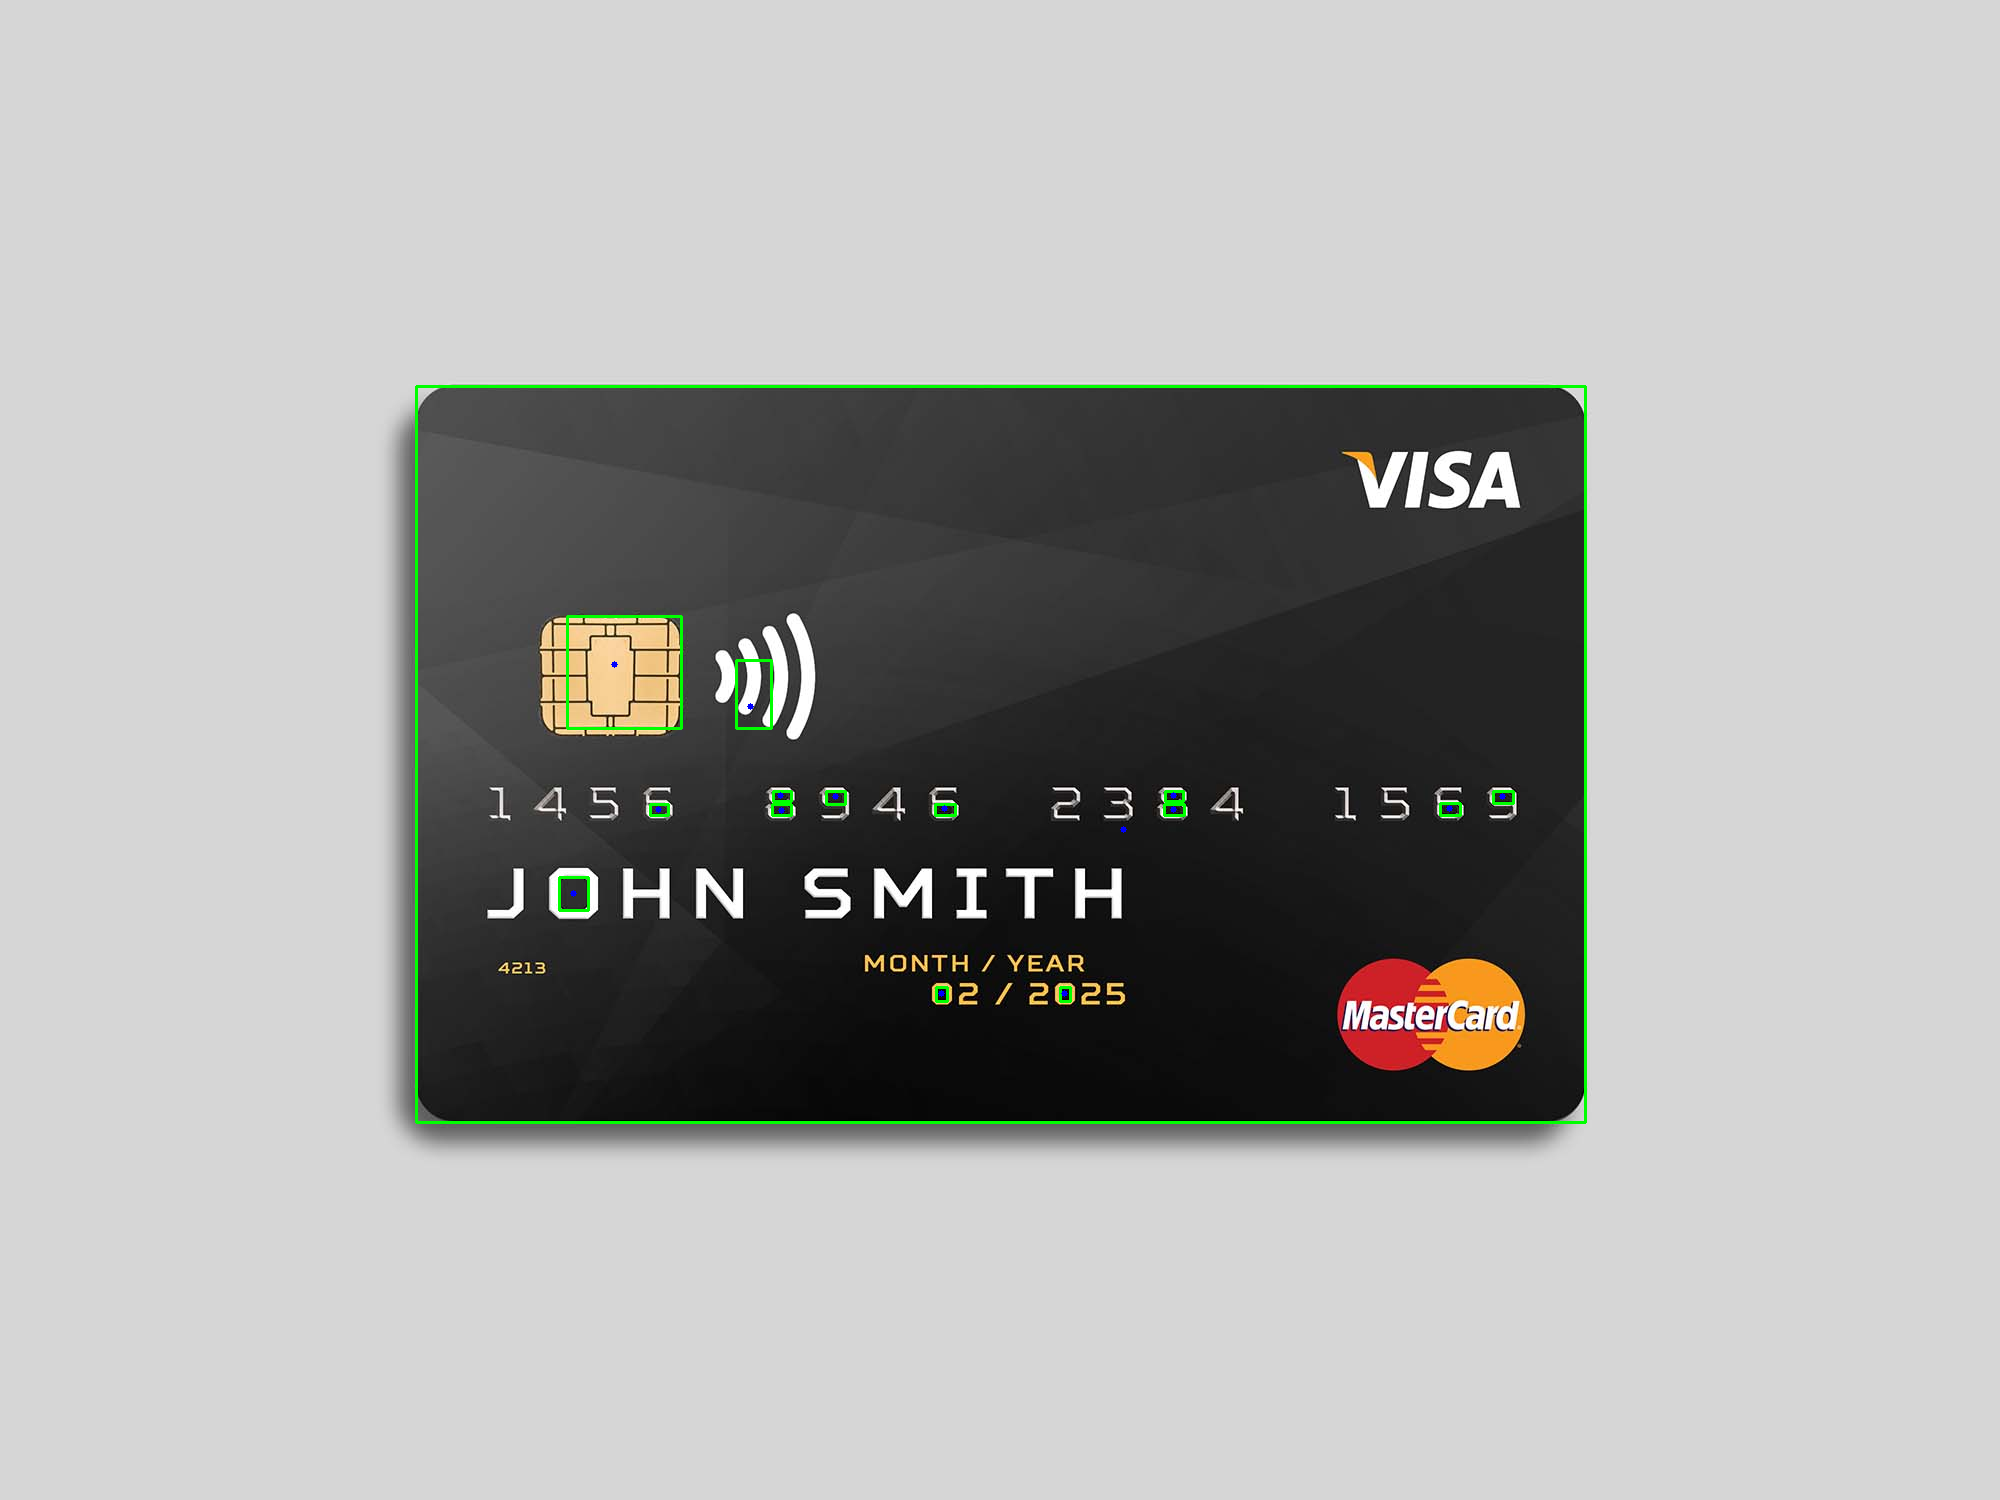

In [ ]:
import cv2
import numpy as np

# Normal routines
img = cv2.imread("images-1.jpeg")

#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,50,255,1)

# Remove some small noise if any.
dilate = cv2.dilate(thresh,None)
erode = cv2.erode(dilate,None)

# Find contours with cv2.RETR_CCOMP
contours,hierarchy = cv2.findContours(erode,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i,cnt in enumerate(contours):
    # Check if it is an external contour and its area is more than 100
    if hierarchy[0,i,3] == -1 and cv2.contourArea(cnt)>100:
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

        m = cv2.moments(cnt)
        cx,cy = m['m10']/m['m00'],m['m01']/m['m00']
        cv2.circle(img,(int(cx),int(cy)),3,255,-1)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

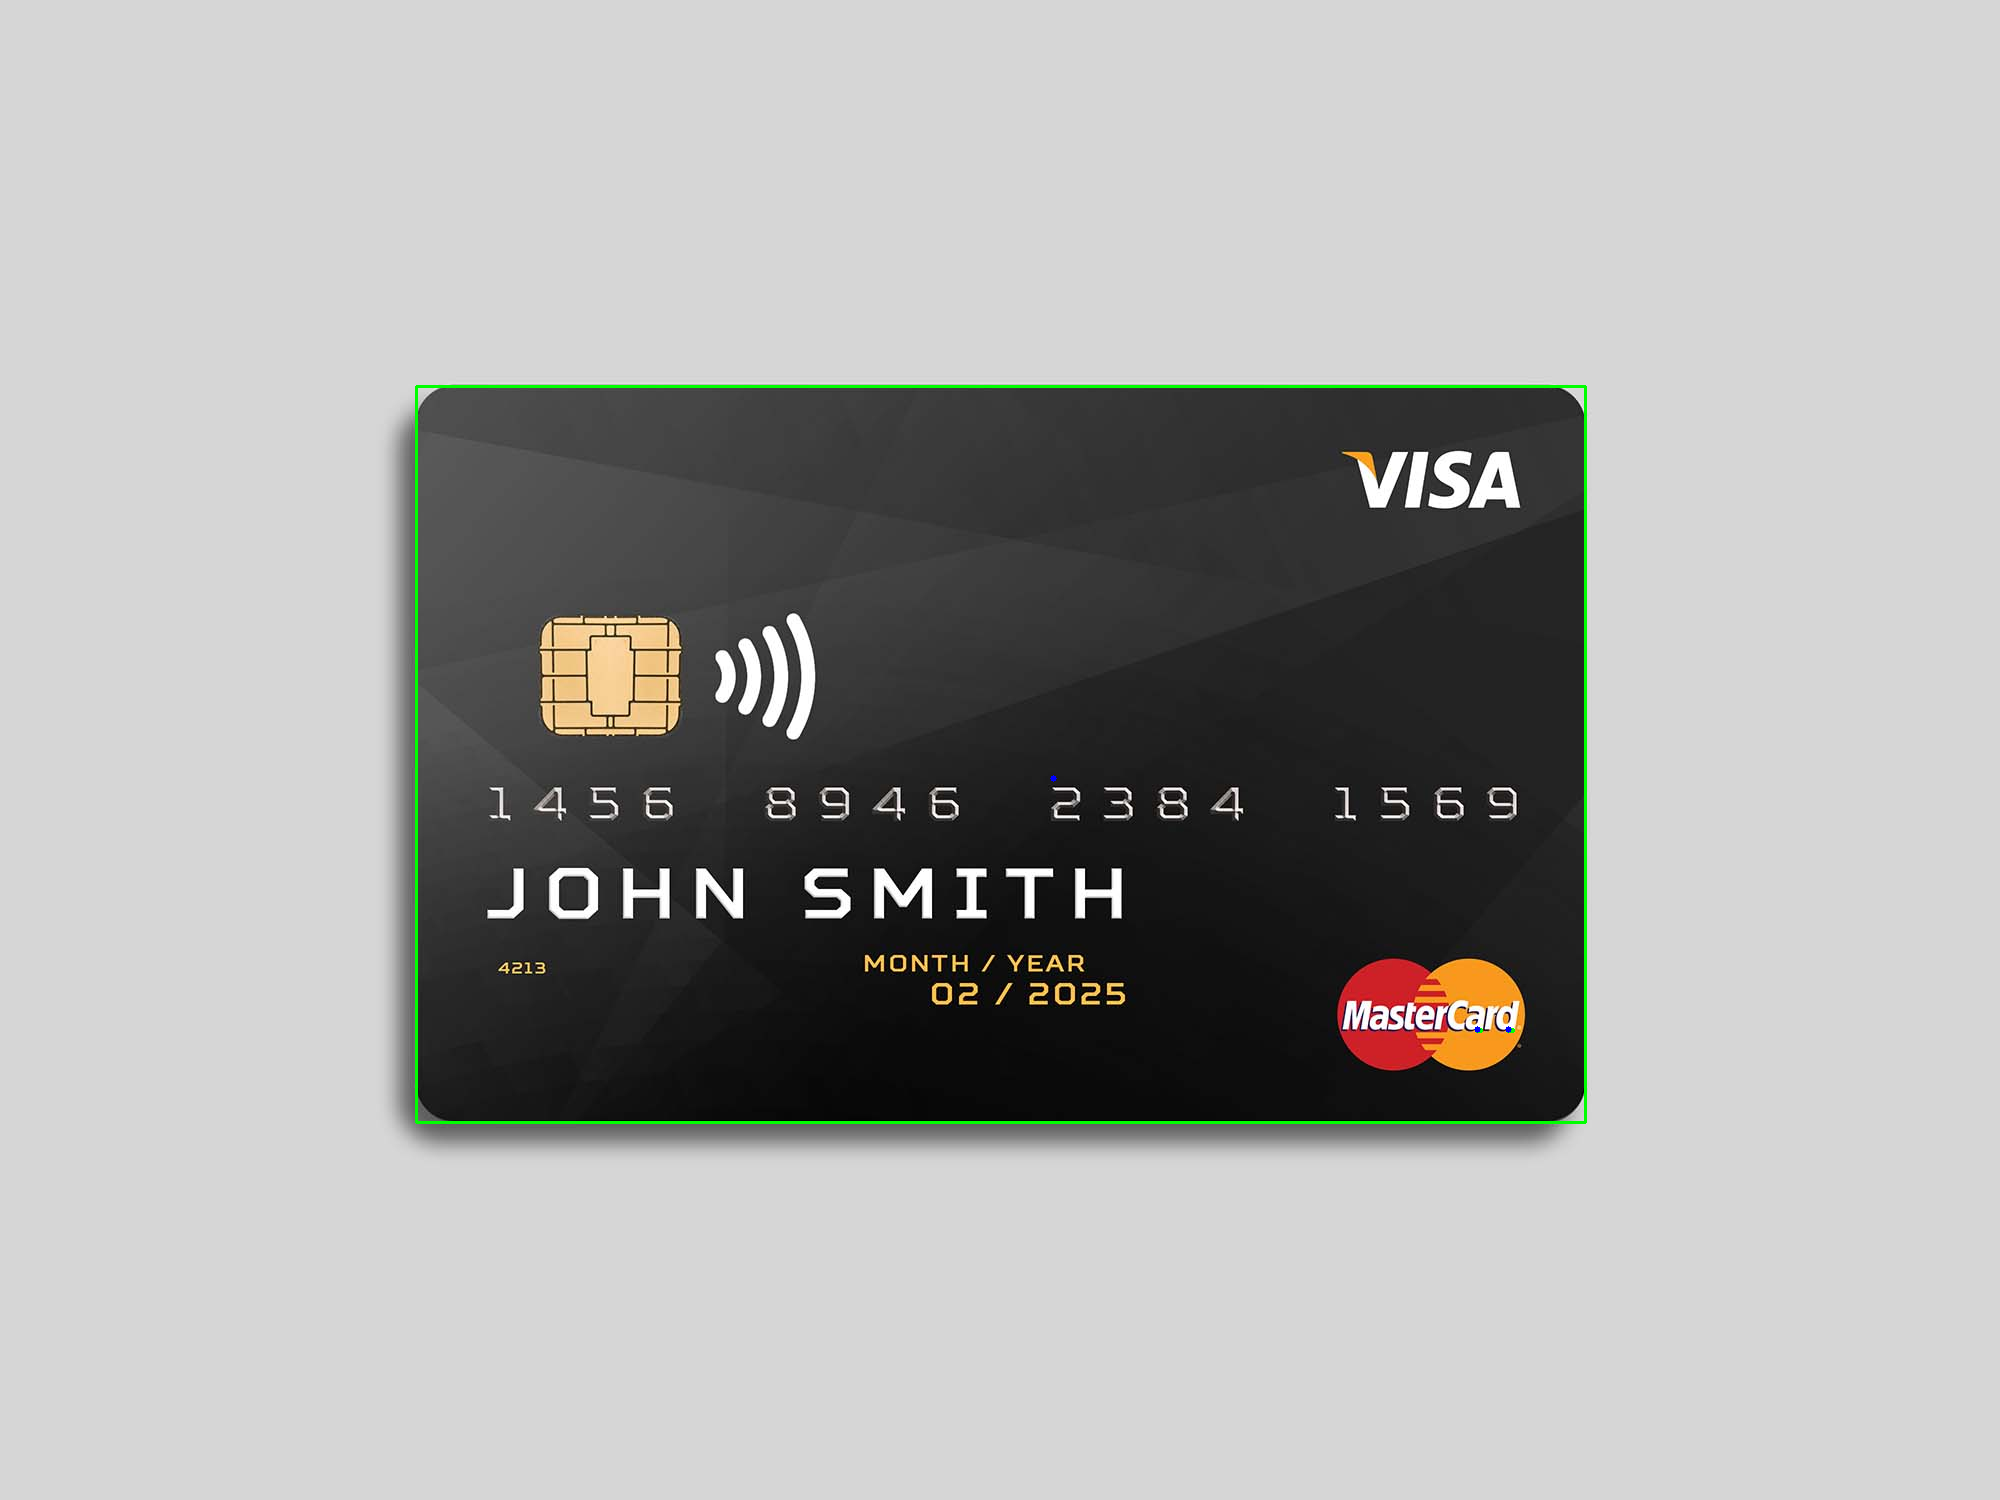

-1

In [ ]:
cnt = sortedPoly[0]
x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

m = cv2.moments(cnt)
cx,cy = m['m10']/m['m00'],m['m01']/m['m00']
cv2.circle(img,(int(cx),int(cy)),3,255,-1)

cv2_imshow(img)
cv2.waitKey(0)

In [ ]:
import cv2
import numpy as np

# Normal routines
img = cv2.imread("images-1.jpeg")
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,50,255,1)

# Remove some small noise if any.
dilate = cv2.dilate(thresh,None)
erode = cv2.erode(dilate,None)

# Find contours with cv2.RETR_CCOMP
contours,hierarchy = cv2.findContours(erode,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

print("Number of Contours found = " + str(len(contours)))


Number of Contours found = 276
